<a href="https://colab.research.google.com/github/BhagatSurya/Imge-Classification-with-DL/blob/main/image_classification_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bhagat Surya Here !!**
⭐

we are going to do the image classfication 

 Data  from  Tensorflow Dataset 

#Getting the Data

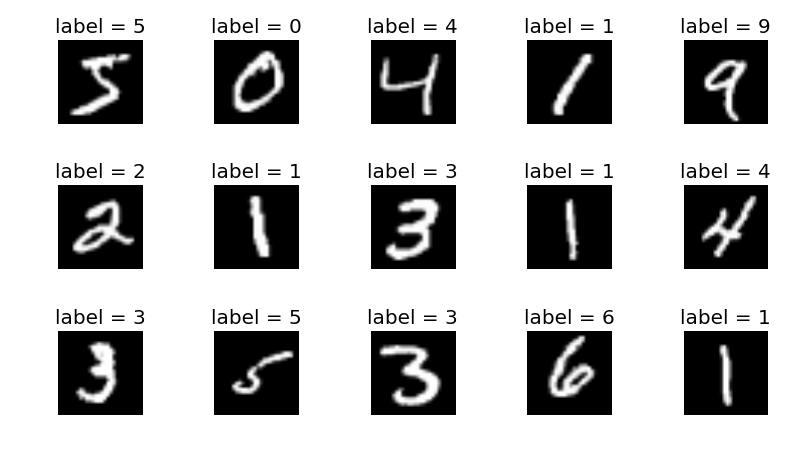

**to find more Details about the dataset :** http://yann.lecun.com/exdb/mnist/

In [1]:
# import pandas, pandas and matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the Data from the tf datasets 
from keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#geting the first sample 
print(f'Training Sample\n{train_data[0]}')
print(f'Training Sample\n{train_labels[0]}')

Training Sample
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

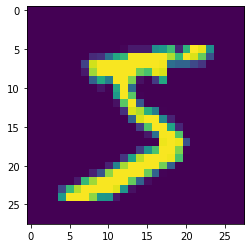

In [4]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [5]:
type(train_labels)#checking the type of the lables  

numpy.ndarray

In [6]:
np.unique(train_labels)#geting the unique values  it means 0 to 9 there are 10 outputs 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
train_data.shape[1:]

(28, 28)

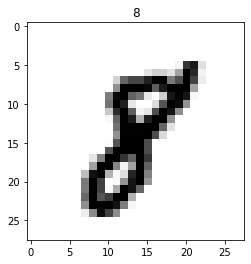

In [8]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(train_labels[17]);

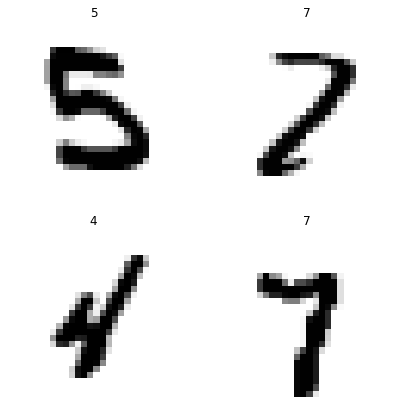

In [9]:
# Plot multiple random images of  MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False)

In [13]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

#ANN 

starting with simple model 

In [14]:
import tensorflow as tf 

In [17]:
tf.random.set_seed(42)

#model creation
mnist_Dens =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer why (28,28) it is the shape  and the Flatten layer convet 2D to 1D  array 
    tf.keras.layers.Dense(5,activation='relu'),#creating a dense layer with 50 N
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),# output shape is 10, activation is softmax
],name='mnist_Dens')

    
#compileing the model 
mnist_Dens.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),#SparseCategoricalCrossentropy is because the ouput is not on hotencoder 
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

#model fit 
history_mist_dens_1=mnist_Dens.fit(train_data,train_labels,
               epochs=20,
             validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8232 - accuracy: 0.7383 - val_loss: 0.5310 - val_accuracy: 0.8460
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4982 - accuracy: 0.8551 - val_loss: 0.4650 - val_accuracy: 0.8666
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4489 - accuracy: 0.8691 - val_loss: 0.4317 - val_accuracy: 0.8740
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4252 - accuracy: 0.8762 - val_loss: 0.4196 - val_accuracy: 0.8753
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4102 - accuracy: 0.8802 - val_loss: 0.4092 - val_accuracy: 0.8837
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4006 - accuracy: 0.8828 - val_loss: 0.3952 - val_accuracy: 0.8854
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3917 - accuracy: 0.8859 - val_loss: 0.3991 - val_accuracy:

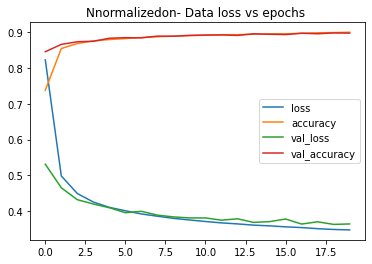

In [18]:
#check the loss vs epochs 
pd.DataFrame(history_mist_dens_1.history).plot(title="Nnormalizedon- Data loss vs epochs ")
